In [44]:
from numpy import sqrt
import numpy as np
from pylab import figure,plot,xlim,xlabel,ylim,ylabel,grid,title,show,legend
from numpy import sqrt,array,arange,linspace,zeros,absolute
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import pandas
from mpl_toolkits.mplot3d import Axes3D
#
# Given values
#

q = 1.60e-19 # q = particle charge [C]
m = 7.0*1.67e-27 # m = Li+ mass [Kg]
KE_eV = 100.0 # KE_eV particle kinetic energy [eV]
E = [0.0, -105.0, 0.0] # E = electric field vector [x, y, z] [N/C]
B = [0.002, 0.0, 0.0]
R_mm = 1.0 # R = radius of the exit aperture [mm]
L = .25 # Length traveled in field [mm]
u = [1.0, 1.0, 100.0]/sqrt(10002.0) #velocity vector u-hat
Ntraj = 1000 #number of trajectories

In [45]:
#
# Derived values
# 
qm = q/m # charge over mass [C/Kg]
KE = KE_eV*1.602e-19 #Particle becomes charged by E field [J]
v = sqrt(2.0*KE/m) # KE = 1/2mv^2 particle velocity magnitude [m/s]
v_x = v*u[0] # initial velocity in x-hat 
v_y = v*u[1] # initial velocity in y-hat
v_z = v*u[2] # initial velocity in z-hat
v_s = [v_x, v_y, v_z] # velocity vector
R = 0.001*R_mm # radius of the exit aperture [m]
vzpass = -E[1]/B[0] # vzpass = velocity of z without apperature deflection

#setup array for z-velocities
vz = vzpass + linspace(-L*vzpass, L*vzpass, Ntraj+1) 
        # z initial velocities
particle_pass = zeros(Ntraj+1)


tmax = L/vzpass;

# Set up the time interval
t1 = 0.0 # initial time
t2 = tmax # final scaled time
n = 1000 # number of time steps
h = (t2-t1)/n # time step size
tpoints = arange(t1,t2,h)


In [46]:
# finding derivatives of position and velocity
def derivs (r,t): 
    d = [r[1], r[3], r[5]] # r[1] = v_x, r[3] = v_y, r[5] = v_z
    a = qm * (E + np.cross (d,B)) 
    return array([d[0],a[0],d[1],a[1],d[2],a[2]],float)

In [47]:
# initial conditions 
p = [0,0,0] # [x,y,z] intitial coordinates of particle [m]
d = p
vv = [0,0,0] # [v_x,v_y,v_z] intitial velocity components [m/s]
a = vv

In [48]:
for i in range(0,Ntraj):
    #Initial conditions
    a[2]= vz[i] # intitial z-velocity of the charged particle [m/s]
    r0 = array([d[0],a[0],d[1],a[1],d[2],a[2]], float)
    
    r = odeint(derivs,r0,tpoints) ######### integrating (ordinary differential equation)

    
    # Extract the 1D matrices of position values
    position_x = r[:,0]
    position_y = r[:,2]
    
    # Check if the particle made it through the aperture
    if absolute(position_x[n-1]) < R:
        if absolute(position_y[n-1]) < sqrt(R*R - position_x[n-1]*position_x[n-1]):
            particle_pass[i] = 1.0
        else:
            particle_pass[i] = 0.0
    else:
        particle_pass[i] = 0.0
        

In [49]:
#absolute(position_x[N-1])

In [50]:
# Look for the specific value of 
for i in range (Ntraj//2,Ntraj):
    if absolute(particle_pass[i]-particle_pass[i-1]) > 0.5:
        #print"i = %d"%(i-1),"vz[i] = %.3e"%vz[i-1]," m/s."
        Deltav = vz[i-1] - vzpass
        #print"Delta v = %.3e"%Deltav," m/s."
        Deltavovervzpass = Deltav/vzpass
        #print"Delta v/vzpass = %.3e"%Deltavovervzpass

In [51]:


# The array of time values at which to store the solution
#tpoints = arange(t1,t2,h)
#

# Calculate the solution using odeint


#print("The magnitude of the initial velocity is " + str(int(v)) + " m/s.")
#print("The x-component of the acceleration is " + str(int(a[0])) + " m/s^2.")
#print("The y-component of the acceleration is " + str(int(a[1])) + " m/s^2.")
#print("The z-component of the acceleration is " + str(int(a[2])) + " m/s^2.")

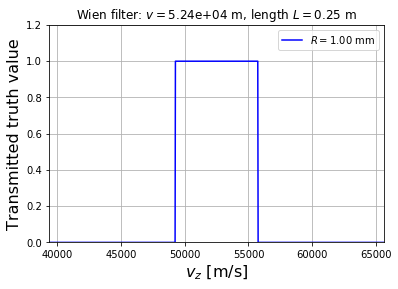

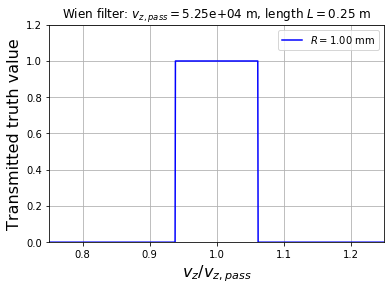

In [52]:
###### start a new figure
figure()

# Plot the particle pass function versus z-velocity
plot(vz,particle_pass,"b-",label='$R = $%.2f mm'%R_mm)
xlim(min(vz),max(vz))
ylim(0.0,1.2)
xlabel("$v_z$ [m/s]",fontsize=16)
ylabel("Transmitted truth value",fontsize=16)
grid(True)
title('Wien filter: $v = $%.2e m, length $L = $%.2f m'%(v,L))
legend(loc=1)
show()

# start a new figure
figure()

# Plot the particle pass function versus scaled z-velocity
plot(vz/vzpass,particle_pass,"b-",label='$R = $%.2f mm'%R_mm)
xlim(min(vz/vzpass),max(vz/vzpass))
ylim(0.0,1.2)
xlabel("$v_z/v_{z,pass}$",fontsize=16)
ylabel("Transmitted truth value",fontsize=16)
grid(True)
legend(loc=1)
title('Wien filter: $v_{z,pass} = $%.2e m, length $L = $%.2f m'%(vzpass,L))
show()